In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
treino = pd.read_csv('train.csv')
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
treino.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
teste = pd.read_csv('test.csv')
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Tratamentos

treino['Sex_binario'] = treino['Sex'].apply(lambda x: 1 if x == 'female' else 0)
teste['Sex_binario'] = teste['Sex'].apply(lambda x: 1 if x == 'female' else 0)

treino.fillna(value=-1)
teste.fillna(value=-1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,-1,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,-1,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,-1,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,-1,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,-1,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,-1.0,0,0,A.5. 3236,8.0500,-1,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,-1,S,0
416,1308,3,"Ware, Mr. Frederick",male,-1.0,0,0,359309,8.0500,-1,S,0


In [6]:
treino.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_binario'],
      dtype=object)

In [7]:
colunas = ['Sex_binario', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked' ]

In [8]:
for coluna in ['Cabin', 'Embarked']:
    treino[coluna]=pd.Categorical(treino[coluna]).codes
    teste[coluna]=pd.Categorical(teste[coluna]).codes

In [9]:
entradas = colunas[0:7]
saida = 'Survived'

X = treino[entradas]
y = treino[saida]

X = X.fillna(-1)

from sklearn.model_selection import train_test_split

X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.5, random_state=0)

In [18]:
# validacao cruzada
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
print('Colunas:', X.columns.values)
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)
for linhas_treino, linhas_teste in kf.split(X):

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_teste]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_teste]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1,random_state=1)
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    print('Acuracia: ', acc)
    resultados.append(acc)
        
print('Media acuracia:',  np.mean(resultados))


Colunas: ['Sex_binario' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked']
Acuracia:  0.7892376681614349
Acuracia:  0.7887640449438202
Acuracia:  0.8228699551569507
Acuracia:  0.797752808988764
Acuracia:  0.7825112107623319
Acuracia:  0.7752808988764045
Acuracia:  0.7982062780269058
Acuracia:  0.7662921348314606
Acuracia:  0.7892376681614349
Acuracia:  0.7955056179775281
Acuracia:  0.804932735426009
Acuracia:  0.7932584269662921
Acuracia:  0.8094170403587444
Acuracia:  0.797752808988764
Acuracia:  0.7869955156950673
Acuracia:  0.7955056179775281
Acuracia:  0.8475336322869955
Acuracia:  0.8089887640449438
Acuracia:  0.7780269058295964
Acuracia:  0.8134831460674158
Media acuracia: 0.7970776439764197


In [19]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


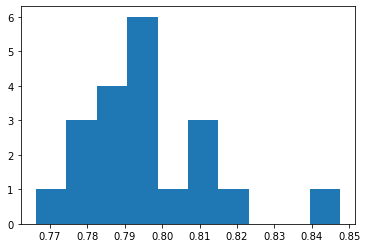

In [20]:
pylab.hist(resultados);

In [21]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1,random_state=1)
modelo.fit(X, y)
p = modelo.predict(teste[entradas].fillna(-1))

In [22]:
p

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [23]:
df_final = pd.DataFrame()
df_final['PassengerId'] = teste['PassengerId']
df_final['Survived'] = p
df_final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [24]:
df_final.to_csv('final.csv', index=False)